In [2]:
#|default_exp benchmarking.single_cell
#|hide
## Standard libraries
import os
import math
import numpy as np
import time
from fastcore.all import *
from nbdev.showdoc import *

# ## Imports for plotting
# import matplotlib.pyplot as plt
## Progress bar
from tqdm.auto import tqdm, trange

from functools import partial

## project specifics
import diffusion_curvature
import pygsp
import jax
import jax.numpy as jnp
from diffusion_curvature.core import *
from diffusion_curvature.utils import *
# from diffusion_curvature.comparison_space import *
from diffusion_curvature.kernels import *

%load_ext autoreload
%autoreload 2
    
jax.devices()
# jax.default_device = jax.devices("cpu")

[CpuDevice(id=0)]

# Diffusion Curvature of Single-Cell Data

In [3]:

import numpy as np
import codecs, json

def load_json_files(file_path):
    '''
    Loads data from a json file

    Inputs:
        file_path   the path of the .json file that you want to read in

    Outputs:
        json_data    this is a numpy array if data is numeric, it's a list if it's a string

    '''

    #  load data from json file
    with codecs.open(file_path, 'r', encoding='utf-8') as handle:
        json_data = json.loads(handle.read())

    # if a string, then returns list of strings
    if not isinstance(json_data[0], str):
        # otherwise, it's assumed to be numeric and returns numpy array
        json_data = np.array(json_data)

    return json_data

In [4]:
ipsc_points = load_json_files("../data/raw/ipsc_data.json")

In [5]:
ipsc_points.shape

(2005, 33)

In [6]:
X = ipsc_points

In [7]:
import skdim
# dimension estimate
danco = skdim.id.DANCo().fit(X)
danco.dimension_

12.00925792699174

In [8]:
kernel, ns = tune_curvature_agnostic_kernel(X, 120, tolerance = 5, max_iterations = 100, alpha = 0)

In [9]:
DC = DiffusionCurvature2(
    graph_former = kernel,
    smoothing = 1
)

In [19]:
ks_edc = DC.fit(X, dim = 12, ts = list(range(1,40)), locality_scale = 0.5) 

In [21]:
np.save("../results/ipsc_diffusion_curvature", ks_edc)

In [12]:
import umap
umap_op = umap.UMAP()
X_umap = umap_op.fit_transform(X)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [13]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Diffusion Curvature of the iPSC Dataset')

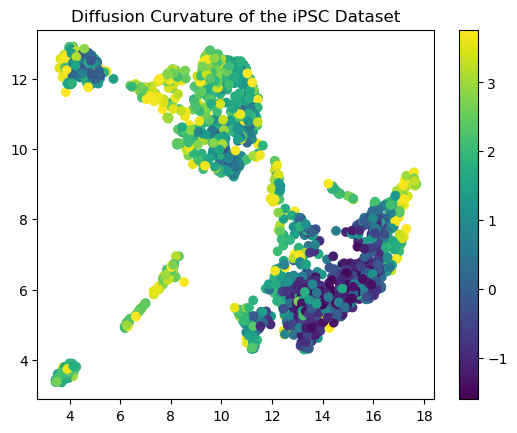

In [20]:
plt.scatter(X_umap[:,0], X_umap[:,1],c=ks_edc)
plt.colorbar()
plt.title("Diffusion Curvature of the iPSC Dataset")

In [2]:
import phate
phate_op = phate.PHATE(knn=15,decay=10)
X_phate = phate_op.fit_transform(X)

ModuleNotFoundError: No module named 'phate'

In [ ]:
phate.plot.scatter2d(X_phate,c=ks_edc,xticks = False, yticks = False, title="Diffusion Curvature of Pancreas Dataset")